This is a small Jupyter Notebook with some exercices to test how well you can handle basic dataframes, train models, evaluate models and present the results.

In [70]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Markdown, display

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split


def printmd(string):
    display(Markdown(string))

Open the dataframe in data_example.csv, and plot the data. Convert the time to datetime (it is in unix ms) before plotting for each serial_no value.

        serial_no                date  delta_t_ms  on-off  active_power_mw  \
198787         30 2022-07-16 08:26:40         841     0.0             13.0   
198789         30 2022-07-16 08:26:40         843     0.0             13.0   
198791         30 2022-07-16 08:26:40         841     0.0             13.0   
198889         30 2022-07-16 08:26:40         840     0.0             13.0   
198793         30 2022-07-16 08:26:40         841     0.0             13.0   
198795         30 2022-07-16 08:26:40         874     0.0             13.0   
198797         30 2022-07-16 08:26:40         841     0.0             13.0   
198799         30 2022-07-16 08:26:40         842     0.0             13.0   
198801         30 2022-07-16 08:26:40         842     0.0             13.0   
198803         30 2022-07-16 08:26:40         841     0.0             13.0   
198807         30 2022-07-16 08:26:40         842     0.0             13.0   
198895         30 2022-07-16 08:26:40         874     0.0       

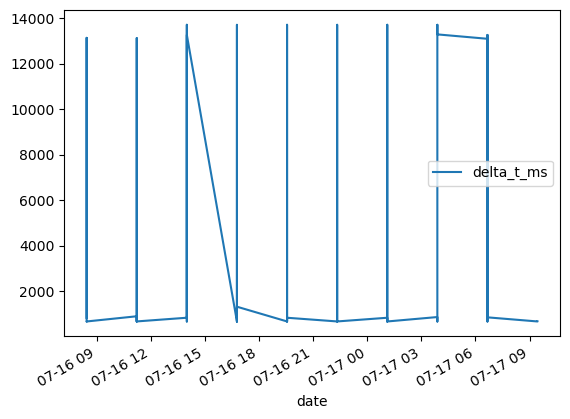

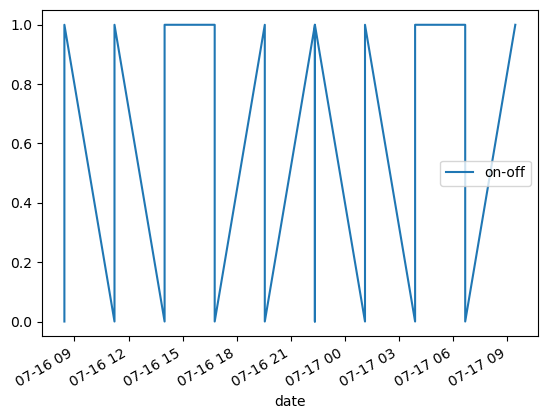

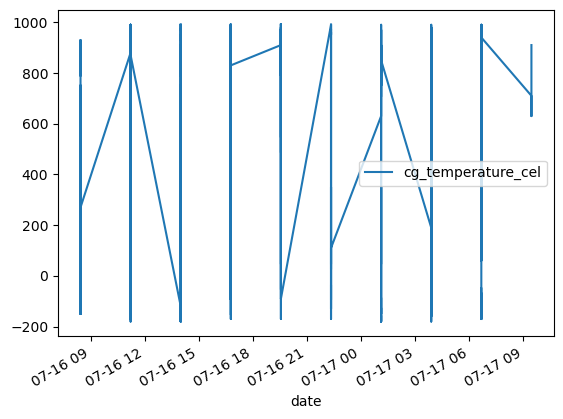

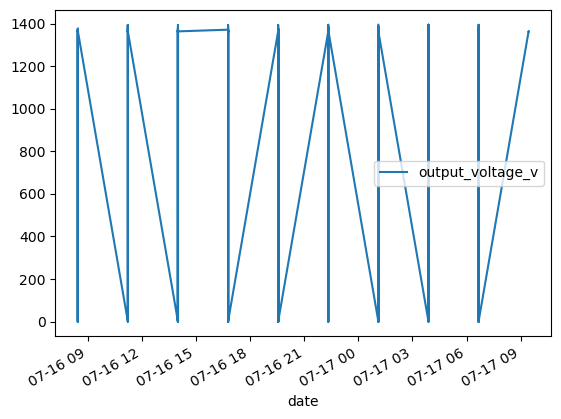

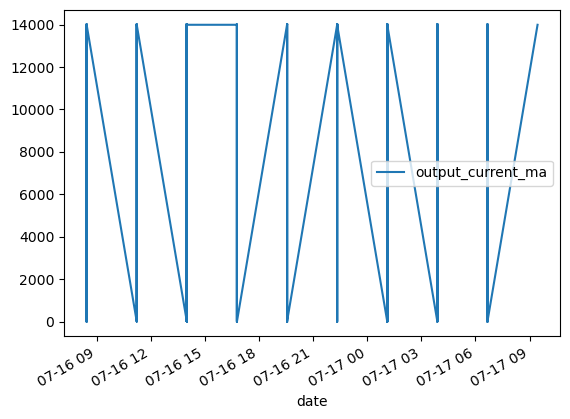

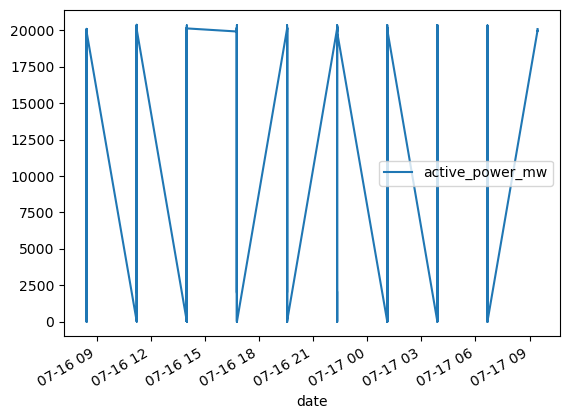

In [144]:
# open data_example.csv
df = pd.read_csv('data.csv')
#df = pd.read_excel('data.xlsx')

# Dropping first two columns - is there an issue with the data?
df.drop(['Column1', 'Unnamed: 0'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)


# convert timestamps
df['start_time_unix_ms'] = pd.to_datetime(df['start_time_unix_ms'], unit='ms')
df = df.rename({'start_time_unix_ms': 'date'}, axis=1)
df.sort_values(by='date', ascending = True, inplace = True) # re-order by date
#print(df.head(10))

# Sort by serial number
serial_numbers = df['serial_no'].unique() # Only 227 and 30
#print('Serial numbers:', serial_numbers)

# Get by serial number
df_30 = df[df['serial_no'] == 30]
df_227 = df[df['serial_no'] == 227]

#printmd("## Sample results for serial_no 30")
sample_30 = df_30.iloc[65000:66000]

print(sample_30.head(20))
#sample_30.to_csv('sample_30_65-66.csv')

#sample_30.plot(x="date", y="on-off")
#sample_30.plot(x="date", y="delta_t_ms")
#sample_30.plot(x="date", y="active_power_mw")
#sample_30.plot(x="date", y="output_voltage_v")
#sample_30.plot(x="date", y="output_current_ma")
#sample_30.plot(x="date", y="cg_temperature_cel")
#plt.scatter(x=sample_30['date'], y=sample_30['delta_t_ms'])

sample_30.plot(x="date", y=[
    #"on-off",
    "delta_t_ms",
    #"active_power_mw",
    #"output_voltage_v",
    #"output_current_ma",
    #"cg_temperature_cel"
])
sample_30.plot(x="date", y=[
    "on-off",
    #"delta_t_ms",
    #"active_power_mw",
    #"output_voltage_v",
    #"output_current_ma",
    #"cg_temperature_cel"
])
sample_30.plot(x="date", y=[
    #"on-off",
    #"delta_t_ms",
    #"active_power_mw",
    #"output_voltage_v",
    #"output_current_ma",
    "cg_temperature_cel"
])
sample_30.plot(x="date", y=[
    #"on-off",
    #"delta_t_ms",
    #"active_power_mw",
    "output_voltage_v",
    #"output_current_ma",
    #"cg_temperature_cel"
])
sample_30.plot(x="date", y=[
    #"on-off",
    #"delta_t_ms",
    #"active_power_mw",
    #"output_voltage_v",
    "output_current_ma",
    #"cg_temperature_cel"
])
sample_30.plot(x="date", y=[
    #"on-off",
    #"delta_t_ms",
    "active_power_mw",
    #"output_voltage_v",
    #"output_current_ma",
    #"cg_temperature_cel"
])

plt.show()
plt.savefig('sample_30.jpg')
plt.close()  # prevents figure from being displayed when code cell is executed

#printmd("## Sample results for serial_no 227")

sample_227 = df_227.iloc[20000:23000]

#sample_227.plot(x="date", y="on-off")
#sample_227.plot(x="date", y="delta_t_ms")
#sample_227.plot(x="date", y="active_power_mw")
#sample_227.plot(x="date", y="output_voltage_v")
#sample_227.plot(x="date", y="output_current_ma")
#sample_227.plot(x="date", y="cg_temperature_cel")


sample_227.plot(x="date", y=[
    
    "on-off",
    #"delta_t_ms",
    "active_power_mw",
    "output_voltage_v",
    "output_current_ma",
    #"cg_temperature_cel"
])
#plt.show()
plt.savefig('sample_227.jpg')
plt.close()  # prevents figure from being displayed when code cell is executed


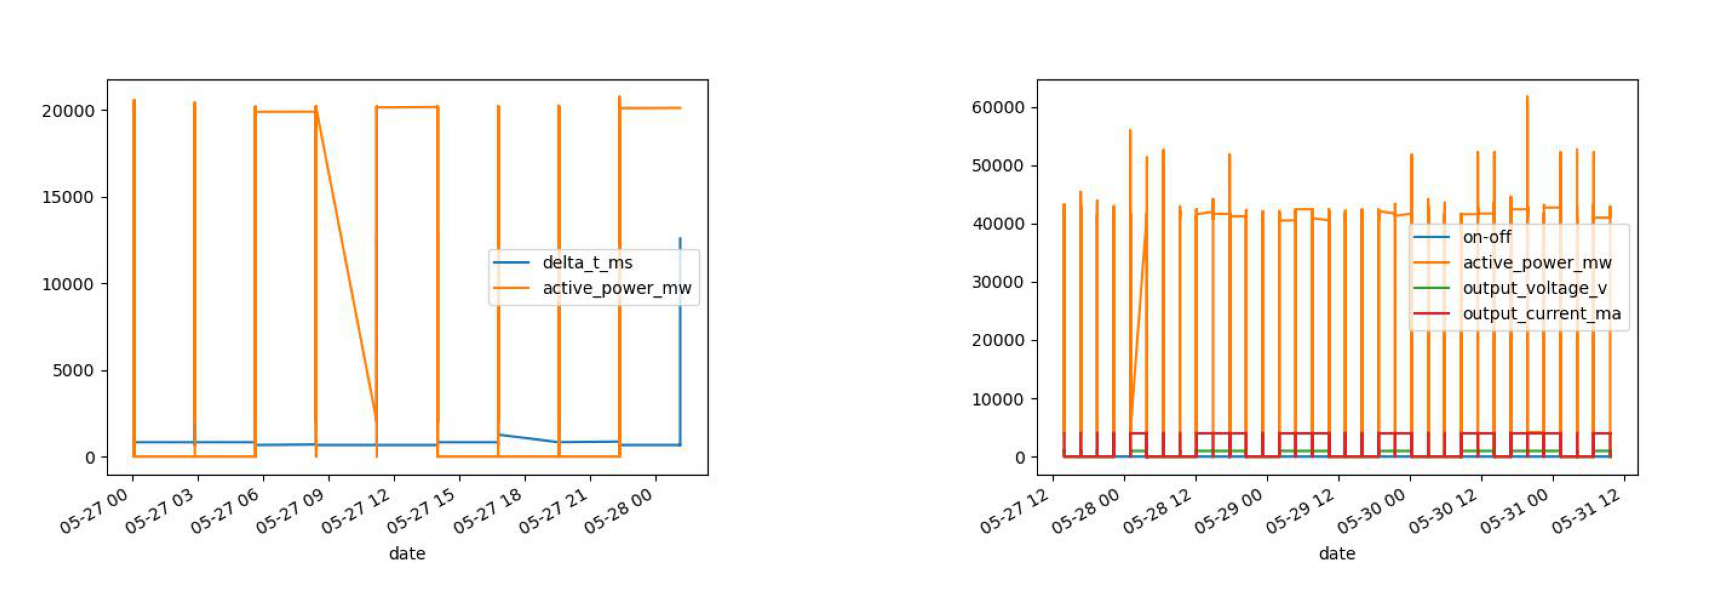

In [121]:
#Display the results

img_30 = mpimg.imread('sample_30.jpg')
img_227 = mpimg.imread('sample_227.jpg')

# create the subplot axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 16))

# plot the images
ax1.imshow(img_30)
ax2.imshow(img_227)

# turn of the axis
ax1.axis('off')
_ = ax2.axis('off')

Choose a serial_no, and get the points corresponding to this serial_no.

Make two regresion models to predict the values of active_power_w, output_voltage_v and output_current_ma from the columns delta_t_ms, on off, cg_temperature_cel (you dont have to use all the columns if you dont need to!), and compare the models. The two regresion algorithms must use diferent algorithms.

In [181]:
# Filter by serial number
    # Useful resource for filtering by column: https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/

df_30 = df[df['serial_no'] == 30]

# Transform the values
def to_on_off(val, mean) -> int:
    if (val > mean):
        return 1
    else:
        return 0

# Future works - mean might not be the best thing to use to discern between the two categories
# but in the interest of time that's what I'm using here
output_voltage_mean = df_30.loc[:,'output_voltage_v'].mean()
output_current_mean = df_30.loc[:,'output_current_ma'].mean()
active_power_mean = df_30.loc[:,'active_power_mw'].mean()
print(output_voltage_mean)
print(output_current_mean)
print(active_power_mean)

df_30['output_voltage_on_off'] = df_30['output_voltage_v'].apply(lambda x: to_on_off(x,output_voltage_mean))
df_30['output_current_on_off'] = df_30['output_current_ma'].apply(lambda x: to_on_off(x,output_current_mean))
df_30['active_power_on_off'] = df_30['active_power_mw'].apply(lambda x: to_on_off(x,active_power_mean))
print(df_30.head(50))

#printmd("## Sample results for serial_no 30")

sample_30 = df_30.iloc[65000:66000]

sample_30.to_csv('sample_30_65-66.csv')


804.5931332423829
8234.794452023647
10699.900479034653
     serial_no                date  delta_t_ms  on-off  active_power_mw  \
122         30 2022-04-27 09:00:00         680     NaN             31.0   
124         30 2022-04-27 09:00:00         683     NaN             31.0   
130         30 2022-04-27 09:00:00         682     NaN             31.0   
133         30 2022-04-27 09:00:00         683     0.0             13.0   
135         30 2022-04-27 09:00:00         681     0.0             13.0   
155         30 2022-04-27 09:00:00         710     NaN             31.0   
118         30 2022-04-27 09:00:00         719     NaN             31.0   
1           30 2022-04-27 09:00:00         682     0.0             13.0   
3           30 2022-04-27 09:00:00         683     0.0             13.0   
5           30 2022-04-27 09:00:00         684     0.0             13.0   
7           30 2022-04-27 09:00:00         693     0.0             13.0   
11          30 2022-04-27 09:00:00         72

/var/folders/ch/4m8xlc297wn8w8_5bk61fd740000gn/T/ipykernel_23690/1624766406.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30['output_voltage_on_off'] = df_30['output_voltage_v'].apply(lambda x: to_on_off(x,output_voltage_mean))
/var/folders/ch/4m8xlc297wn8w8_5bk61fd740000gn/T/ipykernel_23690/1624766406.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30['output_current_on_off'] = df_30['output_current_ma'].apply(lambda x: to_on_off(x,output_current_mean))
/var/folders/ch/4m8xlc297wn8w8_5bk6

In [222]:
# Get the training and testing data ready for both models
df_30_nonan = df_30.dropna(how='any') # Drop rows where there are nan values as the models won't know what to do with those
#x = df_30_nonan[['cg_temperature_cel', 'on-off', 'delta_t_ms']]
x = df_30_nonan[[ 'on-off']]
active_power_y = df_30_nonan['active_power_on_off']
output_voltage_y = df_30_nonan['output_voltage_on_off']
output_current_y = df_30_nonan['output_current_on_off']
test_size = 0.3

# We have to split our data between training set, and testing set.
x_power_train, x_power_test, y_power_train, y_power_test = train_test_split(x, active_power_y, test_size = test_size)
x_voltage_train, x_voltage_test, y_voltage_train, y_voltage_test = train_test_split(x, output_voltage_y, test_size = test_size)
x_current_train, x_current_test, y_current_train, y_current_test = train_test_split(x, output_current_y, test_size = test_size)


In [223]:
## model 1

# Linear regression models for output power, voltage and current. Assuming this does not work well.
linear_regr_power = linear_model.LinearRegression()
linear_regr_voltage = linear_model.LinearRegression()
linear_regr_current = linear_model.LinearRegression()

# training model 1
linear_regr_power.fit(x_power_train, y_power_train)
linear_regr_voltage.fit(x_voltage_train, y_voltage_train)
linear_regr_current.fit(x_current_train, y_current_train)

# evaluating model1
predictions_power = linear_regr_power.predict(x_power_test)
predictions_voltage = linear_regr_voltage.predict(x_voltage_test)
predictions_current = linear_regr_current.predict(x_current_test)
#
#print(metrics.mean_absolute_error(y_test, predictions))
#print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

mae_power = metrics.mean_absolute_error(y_power_test, predictions_power)
mse_power = metrics.mean_squared_error(y_power_test, predictions_power)
r2_power = metrics.r2_score(y_power_test, predictions_power)

mae_voltage = metrics.mean_absolute_error(y_voltage_test, predictions_voltage)
mse_voltage = metrics.mean_squared_error(y_voltage_test, predictions_voltage)
r2_voltage = metrics.r2_score(y_voltage_test, predictions_voltage)


mae_current = metrics.mean_absolute_error(y_current_test, predictions_current)
mse_current = metrics.mean_squared_error(y_current_test, predictions_current)
r2_current = metrics.r2_score(y_current_test, predictions_current)


printmd("# Linear Regression model")

printmd("## Power")
print("Power MAE: " ,mae_power)
print("Power MSE: ", mse_power)
print("R2 power", r2_power)
#plt.scatter(y_power_test, predictions_power)
#plt.show()
print("")

printmd("## Voltage")
print("Voltage MAE: " ,mae_voltage)
print("Voltage MSE: ", mse_voltage)
print("R2 voltage", r2_voltage)
#plt.scatter(y_voltage_test, predictions_voltage)
#plt.show()

printmd("## Current")
print("Current MAE: " ,mae_current)
print("Current MSE: ", mse_current)
print("R2 current", r2_current)
#plt.scatter(y_current_test, predictions_current)
#plt.show()

# Linear Regression model

## Power

Power MAE:  0.1151556169299118
Power MSE:  0.058263184243050055
R2 power 0.7656335893421511



## Voltage

Voltage MAE:  0.009058173288921978
Voltage MSE:  0.004433162105594184
R2 voltage 0.9814981833389511


## Current

Current MAE:  0.010074781316207806
Current MSE:  0.00468992470480236
R2 current 0.9805988065795829


In [224]:
# model 2
# Logistic regression. See example: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

logistic_regr_power = linear_model.LogisticRegression()
logistic_regr_voltage = linear_model.LogisticRegression()
logistic_regr_current = linear_model.LogisticRegression()

# training model 2
logistic_regr_power.fit(x_power_train, y_power_train)
logistic_regr_voltage.fit(x_voltage_train, y_voltage_train)
logistic_regr_current.fit(x_current_train, y_current_train)

# evaluating model 2
target_names = ['off', 'on']
predictions_power = logistic_regr_power.predict(x_power_test)
predictions_voltage = logistic_regr_voltage.predict(x_voltage_test)
predictions_current = logistic_regr_current.predict(x_current_test)


mae_power = metrics.mean_absolute_error(y_power_test, predictions_power)
mse_power = metrics.mean_squared_error(y_power_test, predictions_power)
cnf_matrix_power = metrics.confusion_matrix(y_power_test, predictions_power)
accuracy_power = metrics.accuracy_score(y_power_test, predictions_power)
class_power = metrics.classification_report(y_power_test, predictions_power, target_names=target_names)

mae_voltage = metrics.mean_absolute_error(y_voltage_test, predictions_voltage)
mse_voltage = metrics.mean_squared_error(y_voltage_test, predictions_voltage)
cnf_matrix_voltage = metrics.confusion_matrix(y_voltage_test, predictions_voltage)
accuracy_voltage = metrics.accuracy_score(y_voltage_test, predictions_voltage)
class_voltage = metrics.classification_report(y_voltage_test, predictions_voltage, target_names=target_names)

mae_current = metrics.mean_absolute_error(y_current_test, predictions_current)
mse_current = metrics.mean_squared_error(y_current_test, predictions_current)
cnf_matrix_current = metrics.confusion_matrix(y_current_test, predictions_current)
accuracy_current = metrics.accuracy_score(y_current_test, predictions_current)
class_current = metrics.classification_report(y_current_test, predictions_current, target_names=target_names)

printmd("# Logistic Regression model")

printmd("## Power")
print("Power MAE: " ,mae_power)
print("Power MSE: ", mse_power)
print("Power confusion matrix: ", cnf_matrix_power)
print("Accuracy score power: ", accuracy_power)
print("Classification report voltage: ", class_power)

#plt.scatter(y_power_test, predictions_power)
#plt.show()
print("")

printmd("## Voltage")
print("Voltage MAE: " ,mae_voltage)
print("Voltage MSE: ", mse_voltage)
print("Voltage confusion matrix: ", cnf_matrix_voltage)
print("Accuracy score voltage: ", accuracy_voltage)
print("Classification report voltage: ", class_voltage)

#plt.scatter(y_voltage_test, predictions_voltage)
#plt.show()

printmd("## Current")
print("Current MAE: " ,mae_current)
print("Current MSE: ", mse_current)
print("Curernt confusion matrix: ", cnf_matrix_current)
print("Accuracy score current: ", accuracy_current)
print("Classification report current: ", class_current)
#plt.scatter(y_current_test, predictions_current)
#plt.show()


# Logistic Regression model

## Power

Power MAE:  0.06534120327223776
Power MSE:  0.06534120327223776
Power confusion matrix:  [[ 7672  1262]
 [    0 10380]]
Accuracy score power:  0.9346587967277622
Classification report voltage:                precision    recall  f1-score   support

         off       1.00      0.86      0.92      8934
          on       0.89      1.00      0.94     10380

    accuracy                           0.93     19314
   macro avg       0.95      0.93      0.93     19314
weighted avg       0.94      0.93      0.93     19314




## Voltage

Voltage MAE:  0.004452728590659625
Voltage MSE:  0.004452728590659625
Voltage confusion matrix:  [[ 7639    49]
 [   37 11589]]
Accuracy score voltage:  0.9955472714093404
Classification report voltage:                precision    recall  f1-score   support

         off       1.00      0.99      0.99      7688
          on       1.00      1.00      1.00     11626

    accuracy                           1.00     19314
   macro avg       1.00      1.00      1.00     19314
weighted avg       1.00      1.00      1.00     19314



## Current

Current MAE:  0.004711608159884022
Current MSE:  0.004711608159884022
Curernt confusion matrix:  [[ 7851    50]
 [   41 11372]]
Accuracy score current:  0.995288391840116
Classification report current:                precision    recall  f1-score   support

         off       0.99      0.99      0.99      7901
          on       1.00      1.00      1.00     11413

    accuracy                           1.00     19314
   macro avg       1.00      1.00      1.00     19314
weighted avg       1.00      1.00      1.00     19314



Make a model that predicts the future values of active_power_w based on the past values of active_power_w.

In [5]:
# define the model

# train the model

# evaluate the model